In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import glob
import geopandas as gp
plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['figure.facecolor']='w'
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = 'chicago_nsrdb/*.csv'
files = glob.glob(path)
files.sort()

In [3]:
heatwave_threshold = 32 # degrees celcius

In [4]:
def get_area_n(fname):
    """
    returns community area number
    """
    
    comm_n = fname.split('_')[2]
    
    return int(comm_n)

In [5]:
# concatenate temperature
frames = []
for f in files:
    n = get_area_n(f)
    df = pd.read_csv(f, 
                     usecols=['time',
                              f'Temp_{n}',
                              f'RH_{n}',
                              f'SA_{n}',
                              ],
                     index_col='time',
                     parse_dates=True
                     )
    df = df[df[f'Temp_{n}'] > heatwave_threshold]
    frames.append(df)
full_df = pd.concat(frames, axis=1)

In [6]:
full_df

,Temp_10,RH_10,SA_10,Temp_11,RH_11,SA_11,Temp_12,RH_12,SA_12,Temp_13,...,SA_77,Temp_7,RH_7,SA_7,Temp_8,RH_8,SA_8,Temp_9,RH_9,SA_9
time,,,,,,,,,,,,,,,,,,,,,
2000-08-15 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-08-15 13:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-08-15 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-08-15 14:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-08-15 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-28 14:00:00,32.7,50.65,0.17,32.5,51.56,0.19,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.2,52.43,0.15
2020-08-28 14:30:00,32.5,51.22,0.17,32.3,52.14,0.19,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-28 15:00:00,32.3,51.61,0.17,32.2,52.28,0.19,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
get_comm_area = lambda c: int(c.split('_')[1])

In [8]:
sa_df = pd.DataFrame(full_df.iloc[:,2::3].mean(axis=0))
sa_df['commarea_n'] = sa_df.index
sa_df['commarea_n'] = sa_df['commarea_n'].apply(get_comm_area)
sa_df

,0,commarea_n
SA_10,0.148226,10
SA_11,0.141915,11
SA_12,0.138992,12
SA_13,0.138356,13
SA_14,0.138356,14
...,...,...
SA_76,0.163175,76
SA_77,0.103970,77
SA_7,0.125552,7
SA_8,0.070927,8


In [9]:
heatwave_avg = pd.DataFrame({'SA':full_df.iloc[:,2::3].mean(axis=0).values,
              'TEMP':full_df.iloc[:,0::3].mean(axis=0).values,
              'RH':full_df.iloc[:,1::3].mean(axis=0).values
                           }).set_index(sa_df.commarea_n)


In [10]:
heatwave_avg

,SA,TEMP,RH
commarea_n,,,
10,0.148226,33.879397,43.504749
11,0.141915,33.887500,45.215331
12,0.138992,33.669173,46.282632
13,0.138356,33.732984,45.849005
14,0.138356,33.732984,45.849005
...,...,...,...
76,0.163175,33.877114,41.873517
77,0.103970,33.552239,45.950000
7,0.125552,33.533333,46.451143


In [15]:
heatwave_avg.describe()

,SA,TEMP,RH
count,77.000000,77.000000,77.000000
mean,0.127106,33.777351,45.158091
std,0.021893,0.113318,1.039297
min,0.058721,33.492308,41.873517
25%,0.125552,33.724832,44.210501
50%,0.134979,33.787952,45.578744
75%,0.138356,33.872414,45.996865
max,0.163175,33.974733,46.574632


In [11]:
chicago_shp = '../data_misc/chicago_shapefile/geo_export_2702d908-a4db-4dc5-a4de-78a5f3f67445.shp'
chicago_shp = '../data_misc/chicago_shapefile/geo_export_ec346dbb-8c11-44b4-be04-0301ae3f9c64.shp'
chicago = gp.read_file(chicago_shp)
chicago.geoid10 = chicago.geoid10.apply(np.int64)
chicago.head()

,commarea,commarea_n,countyfp10,geoid10,name10,namelsad10,notes,statefp10,tractce10,geometry
0,44,44.0,031,17031842400,8424,Census Tract 8424,None,17,842400,"POLYGON ((-87.62405 41.73022, -87.62405 41.730..."
1,59,59.0,031,17031840300,8403,Census Tract 8403,None,17,840300,"POLYGON ((-87.68608 41.82296, -87.68607 41.823..."
2,34,34.0,031,17031841100,8411,Census Tract 8411,None,17,841100,"POLYGON ((-87.62935 41.85280, -87.62934 41.852..."
3,31,31.0,031,17031841200,8412,Census Tract 8412,None,17,841200,"POLYGON ((-87.68813 41.85569, -87.68816 41.856..."
4,32,32.0,031,17031839000,8390,Census Tract 8390,None,17,839000,"POLYGON ((-87.63312 41.87449, -87.63306 41.874..."


In [12]:
chi_temp = pd.merge(chicago, heatwave_avg, on=['commarea_n'])
chi_temp.head()

,commarea,commarea_n,countyfp10,geoid10,name10,namelsad10,notes,statefp10,tractce10,geometry,SA,TEMP,RH
0,44,44.0,031,17031842400,8424,Census Tract 8424,None,17,842400,"POLYGON ((-87.62405 41.73022, -87.62405 41.730...",0.136187,33.7947,44.431659
1,44,44.0,031,17031440201,4402.01,Census Tract 4402.01,None,17,440201,"POLYGON ((-87.61235 41.74568, -87.61234 41.745...",0.136187,33.7947,44.431659
2,44,44.0,031,17031440202,4402.02,Census Tract 4402.02,None,17,440202,"POLYGON ((-87.60852 41.73660, -87.60875 41.736...",0.136187,33.7947,44.431659
3,44,44.0,031,17031440102,4401.02,Census Tract 4401.02,None,17,440102,"POLYGON ((-87.59956 41.74540, -87.59890 41.745...",0.136187,33.7947,44.431659
4,44,44.0,031,17031440101,4401.01,Census Tract 4401.01,None,17,440101,"POLYGON ((-87.59890 41.74541, -87.59956 41.745...",0.136187,33.7947,44.431659


<AxesSubplot:>

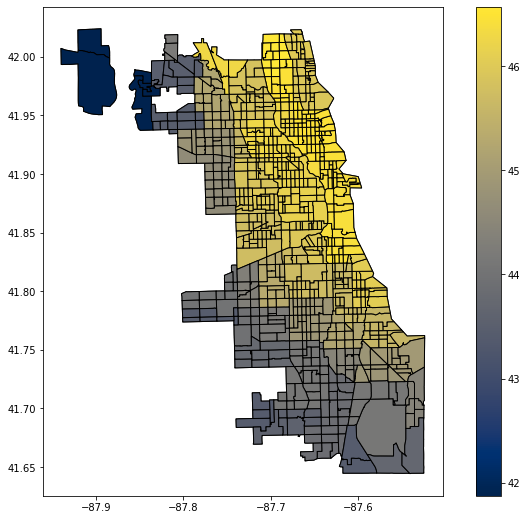

In [16]:
ax = chicago.plot(color='w', edgecolor='k')
# chi_temp.plot(ax=ax,edgecolor='k', column='RH', cmap='cividis', vmin=0,legend=True, scheme='MaxP')
chi_temp.plot(ax=ax,edgecolor='k', column='RH', cmap='cividis',legend=True)

In [ ]:
chi_temp